<a href="https://colab.research.google.com/github/jonatancisneros/AzureBlobLearning/blob/master/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3

The User Acquisition team asks you to help them find a mix of spend in different advertising campaigns that maximizes the chance of reaching a higher return on investment (ROI). 

The ROI is calculated as revenue / spend. The attachment “task3_campaign_performance.csv” contains past performance information of different campaigns with the following data. 

See the appendix for an explanation of the columns.
https://github.com/jonatancisneros/RovioTest/blob/master/images/task3_dictionary.png
 

● Prepare 3 portfolios where you maximize the ROI while minimizing the risk. You could think of risk as the standard deviation of the returns of your proposed portfolio **(A less volatile portfolio is less risky). You could look at the Markowitz model wikipedia page for more information. (Code required if you select this task)**

● Usually when one scales the spend in a campaign the ROI deteriorates with the scale. How would you account for this effect in your model? (No need for code)

● Suppose that you want to monitor that the campaigns are reaching the day 360 target. 

However, for new cohorts you do not know their future revenue at day 360. How long would you wait to observe the revenue of the cohorts to make a recommendation for adjusting the campaign budget according to the observed performance? (No need for code)


In [0]:
#load data 

import pandas as pd 
import matplotlib as pyplot

df=pd.read_csv('https://raw.githubusercontent.com/jonatancisneros/RovioTest/master/task3_campaign_performance.csv?token=AG3RUYJ3GB7KELNDSPIFOZS63LJOO')

df.head()


,registration_date,platform,campaign_id,cohort_age,spend,d7_revenue_mature,d30_revenue_mature,d180_revenue_mature,d360_revenue_mature,target_7,target_30,target_180,target_360
0,2018-06-30,iOS,40,396,78.28,57.191055,72.052467,199.666779,251.173569,0.155479,0.404619,0.588604,0.809235
1,2018-06-30,iOS,41,396,425.62,50.662594,69.290665,80.963631,106.655571,0.155479,0.404619,0.588604,0.809235
2,2018-06-30,iOS,66,396,367.64,10.972462,34.915482,49.872746,52.302204,0.155479,0.404619,0.588604,0.809235
3,2018-06-30,iOS,51,396,456.19,26.355198,37.050022,2001.552368,4174.646973,0.155479,0.404619,0.588604,0.809235
4,2018-06-30,iOS,58,396,196.66,5.352040,6.353893,6.530920,6.655556,0.155479,0.404619,0.588604,0.809235


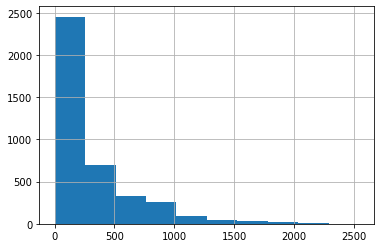

In [0]:


df["spend"].hist()